In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [2]:
df = pd.read_csv('data_after_wrangle.csv')

In [3]:
groupby_launchsite = df.groupby('LaunchSite')
df['LaunchSite'].unique()

array(['CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

In [4]:
cc40 = groupby_launchsite.get_group('CCSFS SLC 40')
va4e = groupby_launchsite.get_group('VAFB SLC 4E')
k39a = groupby_launchsite.get_group('KSC LC 39A')

In [5]:
coor_df = pd.DataFrame({'LaunchSite':['CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], 
                       'Latitude':[cc40['Latitude'].unique(), va4e['Latitude'].unique(), k39a['Latitude'].unique()],
                       'Longitude':[cc40['Longitude'].unique(), va4e['Longitude'].unique(), k39a['Longitude'].unique()]})
coor_df

,LaunchSite,Latitude,Longitude
0,CCSFS SLC 40,[28.5618571],[-80.577366]
1,VAFB SLC 4E,[34.632093],[-120.610829]
2,KSC LC 39A,[28.6080585],[-80.6039558]


In [6]:
launch_map = folium.Map(zoom_start=5, tiles='openstreetmap')
for i in range(0, len(coor_df)):
    folium.Marker(
        location=[int(coor_df['Latitude'][i]), coor_df['Longitude'][i].astype(int)], 
        popup=f'{coor_df["LaunchSite"][i]}',
        icon=folium.Icon(icon='fa-regular')
    ).add_to(launch_map)

launch_map

array([<AxesSubplot:ylabel='FlightNumber'>], dtype=object)

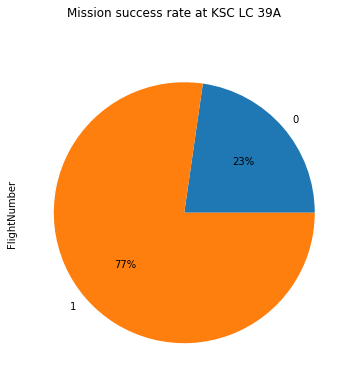

In [7]:
k39a.groupby('Success')['FlightNumber'].nunique().plot.pie(subplots=True, 
                                                                       figsize=(11, 6), autopct='%1.0f%%',
                                                                      title='Mission success rate at KSC LC 39A')

array([<AxesSubplot:ylabel='FlightNumber'>], dtype=object)

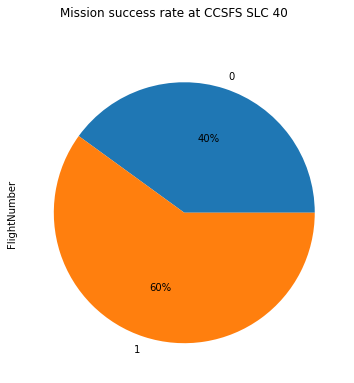

In [8]:
cc40.groupby('Success')['FlightNumber'].nunique().plot.pie(subplots=True, 
                                                                       figsize=(11, 6), autopct='%1.0f%%',
                                                                      title='Mission success rate at CCSFS SLC 40')

<BarContainer object of 2 artists>

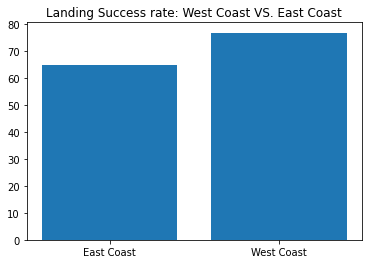

In [9]:
di = {'CCSFS SLC 40':'East Coast', 'VAFB SLC 4E':'West Coast', 'KSC LC 39A':'East Coast'}
df.replace({"LaunchSite": di}, inplace=True)
coasts = {}
coast_types = df['LaunchSite'].unique()
groupby_ls = df.groupby(['LaunchSite'])
for coast in coast_types:
    temp = groupby_ls.get_group(f'{coast}')
    temp2 = temp['Success'].value_counts(normalize=True).mul(100).astype(float)
    coasts[f'{coast}'] = temp2[1]
coast = list(coasts.keys())          
success_rate = list(coasts.values())  
plt.title('Landing Success rate: West Coast VS. East Coast')
plt.bar(coast, success_rate)